In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
import pandas as pd

%matplotlib inline 

In [2]:
df_original = pd.read_csv('..\output\data\sat50_temporal_undivided.csv' , sep=',', index_col='Unnamed: 0')

df_rnd = pd.read_csv('..\output\data\sat50_temporal_RND_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_mirw = pd.read_csv('..\output\data\sat50_temporal_MIRW_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_ffd = pd.read_csv('..\output\data\sat50_temporal_FFD_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')

In [6]:
rnd = df_rnd.groupby('Timestamp').mean()
mirw = df_mirw.groupby('Timestamp').mean()
ffd = df_ffd.groupby('Timestamp').mean()
mirw

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.960000,3.209375,0.319476,0.054844,1.833333,324.933333,0.711194
12,0.960000,3.661806,0.348885,0.051284,1.866667,329.866667,0.701000
24,0.851333,3.374864,0.368065,0.042512,0.333333,267.533333,0.644833
36,0.851333,4.124077,0.403961,0.039537,0.600000,274.800000,0.628583
48,0.851333,4.148513,0.378650,0.035382,0.933333,281.933333,0.619567
...,...,...,...,...,...,...,...
1740,0.960000,4.639583,0.397671,0.031750,2.866667,346.533333,0.667094
1752,0.960000,3.612847,0.365941,0.036443,2.400000,328.733333,0.686656
1764,0.960000,3.378819,0.353863,0.042016,2.033333,333.800000,0.686717


In [7]:
timestamps = list(rnd.index)
original = df_original.loc[timestamps].set_index('Timestamp')
original

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.960000,5.592687,0.532339,-2.775558e-18,5,5012,0.555456
12,0.960000,6.087585,0.552809,5.248087e-18,6,5034,0.553211
24,0.845714,5.669884,0.560839,-1.365395e-18,3,4080,0.513741
36,0.845714,6.782819,0.572776,-2.344787e-17,5,4108,0.508367
48,0.845714,6.779923,0.545780,-1.995802e-18,5,4178,0.504816
...,...,...,...,...,...,...,...
1740,0.960000,7.096939,0.538694,5.307493e-18,8,5172,0.546163
1752,0.960000,6.019558,0.514184,1.149387e-17,6,4954,0.557986
1764,0.960000,5.527211,0.513068,-2.495375e-18,5,5052,0.550844


In [4]:
df_nbc_original = pd.read_csv('..\output\data\sat50_criticity_undivided_sampled12.csv' , sep=',', index_col='Unnamed: 0')
df_nbc_original

,Timestamp,Node,NBC
0,0,0,0.000000
1,0,1,0.000166
2,0,2,0.025184
3,0,3,0.015132
4,0,4,0.002934
...,...,...,...
7495,1788,45,0.010023
7496,1788,46,0.008162
7497,1788,47,0.035136
7498,1788,48,0.069609


In [26]:
df_nbc_rnd = pd.read_csv('..\output\data\sat50_criticity_RND_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_nbc_mirw = pd.read_csv('..\output\data\sat50_criticity_MIRW_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')
df_nbc_ffd = pd.read_csv('..\output\data\sat50_criticity_FFD_sampled12_rep30.csv' , sep=',', index_col='Unnamed: 0')

In [27]:
distrib_original = df_nbc_original.groupby('Timestamp')['NBC'].apply(list)
distrib_rnd = df_nbc_rnd.groupby('Timestamp')['NBC'].apply(list)
distrib_mirw = df_nbc_mirw.groupby('Timestamp')['NBC'].apply(list)
distrib_ffd = df_nbc_ffd.groupby('Timestamp')['NBC'].apply(list)

In [23]:
import matplotlib.ticker as ticker

def box_plot(datasets, index, fill_color, hatch_pattern=None):
    x_pos_range = np.arange(len(datasets)) / (len(datasets) - 1)
    x_pos = (x_pos_range * 0.5) + 0.75
    bp = ax.boxplot(
        np.array(datasets[index]), sym='', whis=[0, 100], widths=0.6 / len(datasets),
        labels=list(datasets[0]),
        positions=[x_pos[index] + j * 1 for j in range(len(datasets[index].T))],
        patch_artist=True
    )
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)
        if hatch_pattern: 
            patch.set(hatch=hatch_pattern)    
    return bp

In [9]:
range_low = np.arange(828-5*12, 828+5*12,12).tolist()
range_avg = np.arange(252-5*12, 252+5*12,12).tolist() 
range_high = np.arange(1788-10*12,1788,12).tolist()
timestamps = [828,252,1788]

In [39]:
data_original = pd.DataFrame({
    'Low': distrib_original.loc[timestamps[0]],
    'Average': distrib_original.loc[timestamps[1]],
    'High': distrib_original.loc[timestamps[2]]
})

data_mirw = pd.DataFrame({
    'Low': distrib_mirw.loc[timestamps[0]],
    'Average': distrib_mirw.loc[timestamps[1]],
    'High': distrib_mirw.loc[timestamps[2]]
})

data_rnd = pd.DataFrame({
    'Low': distrib_rnd.loc[timestamps[0]],
    'Average': distrib_rnd.loc[timestamps[1]],
    'High': distrib_rnd.loc[timestamps[2]]
})

data_ffd = pd.DataFrame({
    'Low': distrib_ffd.loc[timestamps[0]],
    'Average': distrib_ffd.loc[timestamps[1]],
    'High': distrib_ffd.loc[timestamps[2]]
})

datasets = [data_original, data_mirw, data_rnd, data_ffd]

Text(0, 0.5, 'NBC distribution')

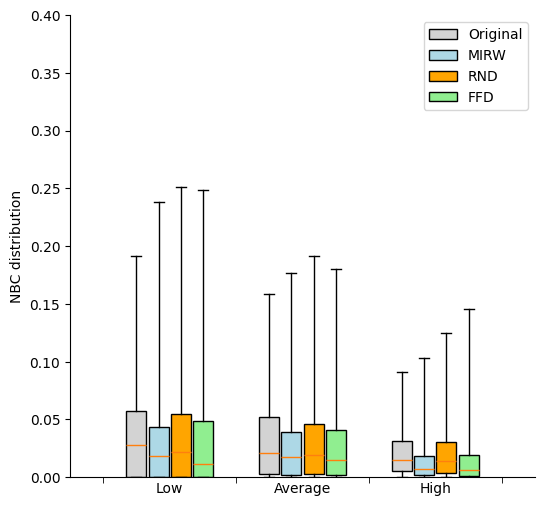

In [40]:
fig, ax = plt.subplots(figsize=(6,6))
bp0 = box_plot(datasets, 0, 'lightgray')
bp1 = box_plot(datasets, 1, 'lightblue')
bp2 = box_plot(datasets, 2, 'orange')
bp3 = box_plot(datasets, 3, 'lightgreen')

plt.xticks(np.arange(len(list(datasets[0]))) + 1)
plt.gca().xaxis.set_minor_locator(ticker.FixedLocator(
    np.array(range(len(list(datasets[0])) + 1)) + 0.5)
)
plt.gca().tick_params(axis='x', which='minor', length=4)
plt.gca().tick_params(axis='x', which='major', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend([bp0["boxes"][0], bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['Original', 'MIRW', 'RND', 'FFD'])
ax.set_ylim(0,0.4)
ax.set_ylabel('NBC distribution')

In [10]:
metric = 'Efficiency'

data_original = pd.DataFrame({
    'Low': original[metric].loc[original.index.isin(range_low)].tolist(),
    'Average': original[metric].loc[original.index.isin(range_avg)].tolist(),
    'High': original[metric].loc[original.index.isin(range_high)].tolist()
})

data_mirw = pd.DataFrame({
    'Low': mirw[metric].loc[mirw.index.isin(range_low)].tolist(),
    'Average': mirw[metric].loc[mirw.index.isin(range_avg)].tolist(),
    'High': mirw[metric].loc[mirw.index.isin(range_high)].tolist()
})

data_rnd = pd.DataFrame({
    'Low': rnd[metric].loc[rnd.index.isin(range_low)].tolist(),
    'Average': rnd[metric].loc[rnd.index.isin(range_avg)].tolist(),
    'High': rnd[metric].loc[rnd.index.isin(range_high)].tolist()
})

data_ffd = pd.DataFrame({
    'Low': ffd[metric].loc[ffd.index.isin(range_low)].tolist(),
    'Average': ffd[metric].loc[ffd.index.isin(range_avg)].tolist(),
    'High': ffd[metric].loc[ffd.index.isin(range_high)].tolist()
})

datasets = [data_original, data_rnd, data_mirw, data_ffd]

Text(0, 0.5, 'Efficiency')

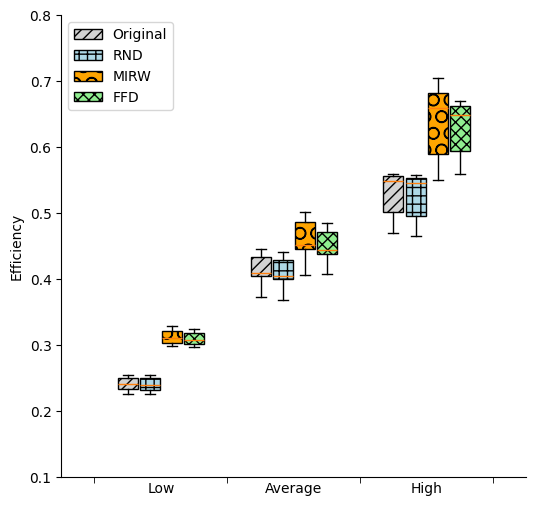

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
bp0 = box_plot(datasets, 0, 'lightgray', hatch_pattern='///')
bp1 = box_plot(datasets, 1, 'lightblue', hatch_pattern='++')
bp2 = box_plot(datasets, 2, 'orange', hatch_pattern='O')
bp3 = box_plot(datasets, 3, 'lightgreen', hatch_pattern='xxx')

plt.xticks(np.arange(len(list(datasets[0]))) + 1)
plt.gca().xaxis.set_minor_locator(ticker.FixedLocator(
    np.array(range(len(list(datasets[0])) + 1)) + 0.5)
)
plt.gca().tick_params(axis='x', which='minor', length=4)
plt.gca().tick_params(axis='x', which='major', length=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend([bp0["boxes"][0], bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['Original', 'RND', 'MIRW', 'FFD'])
ax.set_ylim(0.1,0.8)
ax.set_ylabel('Efficiency')

(0.0, 1.0)

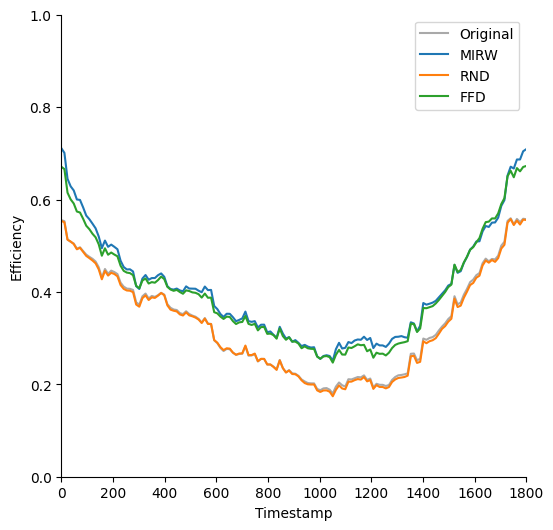

In [18]:
fig,ax = plt.subplots(figsize=(6,6))
idx = np.linspace(0,1800, 150)
#metric = 'Criticity'

ax.plot(idx, original[metric], label='Original', c='darkgray')
ax.plot(idx, mirw[metric], label='MIRW')
ax.plot(idx, rnd[metric], label='RND')
ax.plot(idx, ffd[metric], label='FFD')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_xlabel('Timestamp')
ax.set_ylabel(metric)
ax.set_xlim(0,1800)
ax.set_ylim(0,1)

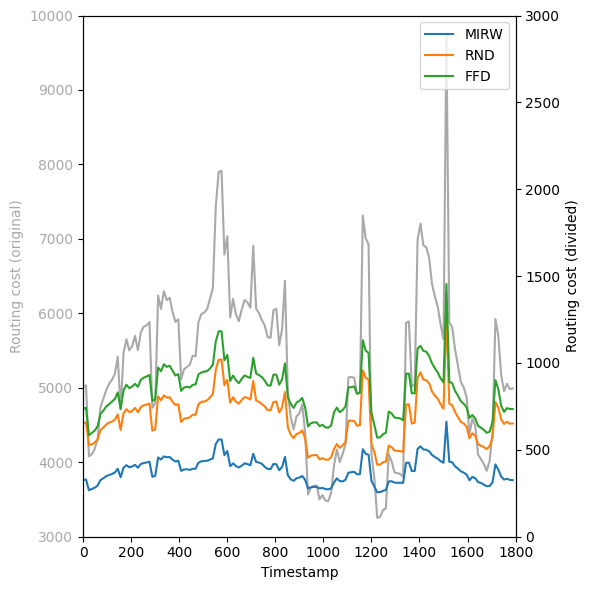

In [49]:
fig, ax = plt.subplots(figsize=(6,6))
idx = list(original.index)
metric = 'RCost'

ax.plot(idx, original[metric], label='Original', c='darkgray')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Routing cost (original)', color='darkgray')
ax.tick_params(axis='y', labelcolor='darkgray')
ax.set_xlim(0,1800)
ax.set_ylim(3000, 10000)
#ax.legend()

ax2 = ax.twinx()
ax2.plot(idx, mirw[metric], label='MIRW')
ax2.plot(idx, rnd[metric], label='RND')
ax2.plot(idx, ffd[metric], label='FFD')
ax2.set_ylabel('Routing cost (divided)', color='black')
ax2.set_ylim(0, 3000)
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend()

fig.tight_layout()

In [50]:
def packet_ratio(df):
    rc = df['RCost'].tolist()
    coef = df['Connectivity'].tolist()
    return [n/m for n,m in zip(rc, coef)]

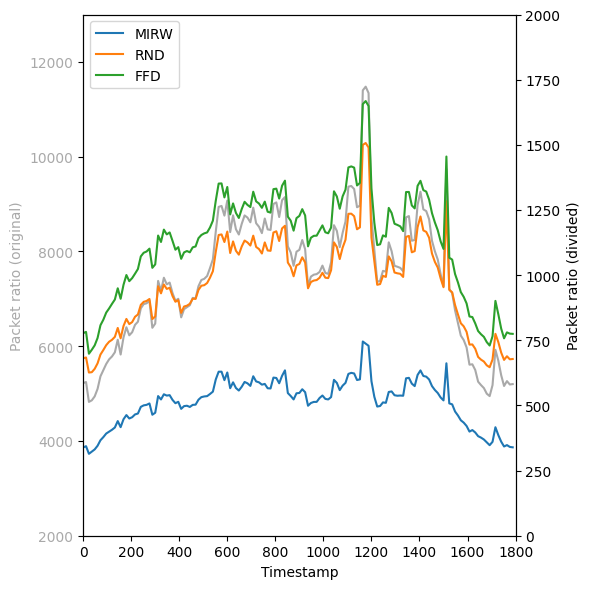

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
idx = list(original.index)

ax.plot(idx, packet_ratio(original), label='Original', c='darkgray')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Packet ratio (original)', color='darkgray')
ax.tick_params(axis='y', labelcolor='darkgray')
ax.set_xlim(0,1800)
ax.set_ylim(2000, 13000)
#ax.legend()

ax2 = ax.twinx()
ax2.plot(idx, packet_ratio(mirw), label='MIRW')
ax2.plot(idx, packet_ratio(rnd), label='RND')
ax2.plot(idx, packet_ratio(ffd), label='FFD')
ax2.set_ylabel('Packet ratio (divided)', color='black')
ax2.set_ylim(0, 2000)
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper left')

fig.tight_layout()

## Correlation analysis

In [52]:
variables = ['Redundancy_avg', 'Connectivity', 'Disparity_avg', 'Criticity', 'RCost', 'Efficiency']

In [53]:
df_original = df_original.set_index('Timestamp')
df_original.head()

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.96,5.592687,0.532339,-2.775558e-18,5,5012,0.555456
1,0.96,5.625850,0.533608,-4.785444e-19,6,5020,0.554639
2,0.96,5.801020,0.538186,-4.163336e-18,6,5020,0.554980
3,0.96,5.895408,0.540828,-5.551115e-18,5,5028,0.554667
4,0.96,5.982143,0.543713,-2.775558e-18,5,5022,0.555075


In [54]:
df_mirw = df_mirw.set_index('Timestamp')
df_mirw.head()

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,
0,0.96,2.916667,0.275919,0.060176,1,308,0.727833
12,0.96,2.989583,0.297316,0.058354,2,308,0.724500
24,0.84,2.714286,0.319282,0.048392,1,250,0.655833
36,0.84,4.976190,0.354895,0.042554,1,260,0.634167
48,0.84,5.785714,0.378437,0.032002,1,278,0.609167


In [55]:
df_original.corr()

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Connectivity,1.000000,0.636064,0.809621,-0.168035,0.095847,0.533089,0.894999
Redundancy_avg,0.636064,1.000000,0.798153,-0.155559,-0.111023,0.151756,0.691908
Disparity_avg,0.809621,0.798153,1.000000,-0.210108,-0.205627,0.112690,0.898495
Modularity,-0.168035,-0.155559,-0.210108,1.000000,-0.025339,-0.085228,-0.168150
Criticity,0.095847,-0.111023,-0.205627,-0.025339,1.000000,0.804497,-0.312079
RCost,0.533089,0.151756,0.112690,-0.085228,0.804497,1.000000,0.116220
Efficiency,0.894999,0.691908,0.898495,-0.168150,-0.312079,0.116220,1.000000


In [56]:
df_mirw.corr()

,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Connectivity,1.000000,0.503319,0.620691,-0.253730,-0.094715,0.429782,0.849433
Redundancy_avg,0.503319,1.000000,0.720071,-0.499191,-0.068292,0.232664,0.388826
Disparity_avg,0.620691,0.720071,1.000000,-0.628888,-0.134715,0.225883,0.478311
Modularity,-0.253730,-0.499191,-0.628888,1.000000,-0.097955,-0.276414,-0.034299
Criticity,-0.094715,-0.068292,-0.134715,-0.097955,1.000000,0.782368,-0.535045
RCost,0.429782,0.232664,0.225883,-0.276414,0.782368,1.000000,-0.074817
Efficiency,0.849433,0.388826,0.478311,-0.034299,-0.535045,-0.074817,1.000000
